# Variance and Covariance

Principal Component Analysis (PCA) relies on a few core statistical concepts. If you've studied statistics before, this will be a helpful review.

### The Mean
The **mean** is the average value of all observations in a dataset. Geometrically, it represents the "center of mass" of your data points.

For a 2D dataset, the mean point has the coordinates $(\mu_x, \mu_y)$, where $\mu_x$ is the average of all x-values and $\mu_y$ is the average of all y-values.

$ \mu_x = \frac{1}{n}\sum_{i=1}^{n} x_i \quad , \quad \mu_y = \frac{1}{n}\sum_{i=1}^{n} y_i $

### Variance: A Measure of Spread

While the mean tells us the center of our data, **variance** tells us how spread out the data is from that center. A small variance means the data is tightly clustered, while a large variance means it's widely dispersed.

We can look at the variance along each axis separately. In the plot below, you can see that the data is more spread out along the horizontal (x-axis) than the vertical (y-axis). Therefore, the x-variance is larger than the y-variance.

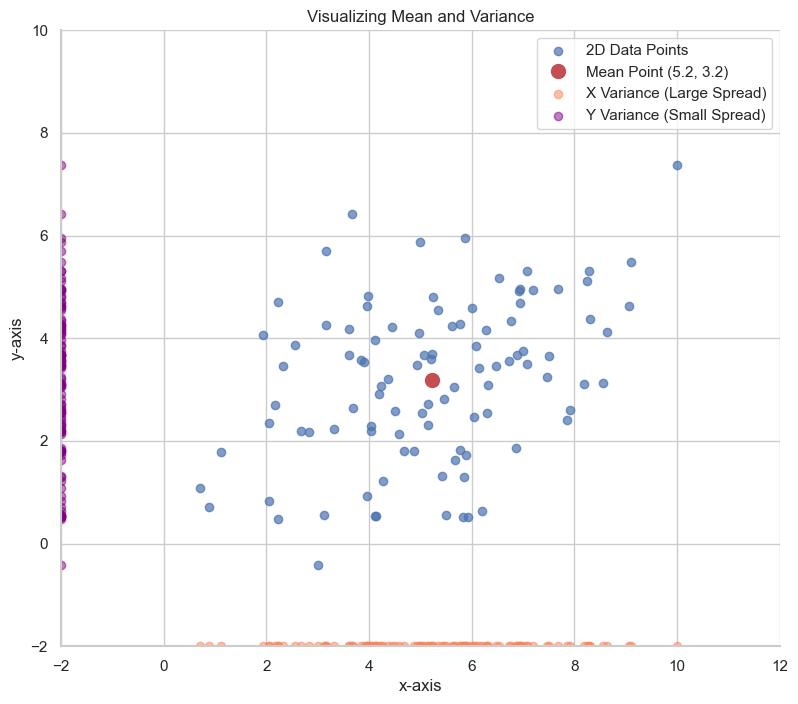

In [3]:
# --- A Note on the Code in This Section ---
# The Python code in these notebooks serves one purpose: to generate the visualizations
# that illustrate the mathematical concepts. You do not need to understand the code
# itself to learn the theory.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the theme for the plots
sns.set_theme(style="whitegrid")

# --- Generate correlated 2D data ---
np.random.seed(42)
# CORRECTED: A valid positive semi-definite covariance matrix
cov_matrix = [[5, 2], [2, 3]] 
data = np.random.multivariate_normal([5, 3], cov_matrix, 100)
mean_vec = np.mean(data, axis=0)

# --- Create the plot ---
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the main 2D scatter plot
ax.scatter(data[:, 0], data[:, 1], alpha=0.7, label='2D Data Points')
ax.plot(mean_vec[0], mean_vec[1], 'ro', markersize=10, label=f'Mean Point ({mean_vec[0]:.1f}, {mean_vec[1]:.1f})')

# Project data onto the axes to show variance
ax.scatter(data[:, 0], np.full(100, -2), alpha=0.5, color='coral', label='X Variance (Large Spread)')
ax.scatter(np.full(100, -2), data[:, 1], alpha=0.5, color='purple', label='Y Variance (Small Spread)')

# --- Format the plot ---
ax.set_xlim(-2, 12)
ax.set_ylim(-2, 10)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_title('Visualizing Mean and Variance')
ax.grid(True)
ax.legend()
ax.set_aspect('equal', adjustable='box')
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

The formula for the variance of a variable `x` is:  

$ \text{Var}(x) = \sigma^2 = \frac{1}{n-1}\sum_{i=1}^{n} (x_i - \mu_x)^2 $

This is the **average squared distance** of each point from the mean. The key takeaway is that as your data becomes more spread out, the variance increases.

---

## Covariance: A Measure of Joint Variance

Variance alone isn't enough to describe a dataset. Two datasets could have the exact same variance for `x` and `y`, but show completely different patterns.

**Covariance** measures how two variables vary *together*.
* **Positive Covariance:** As `x` increases, `y` tends to increase.
* **Negative Covariance:** As `x` increases, `y` tends to decrease.
* **Zero Covariance:** There is no linear relationship between `x` and `y`.

The formula for covariance is similar to variance:  

$ \text{Cov}(x, y) = \frac{1}{n-1}\sum_{i=1}^{n} (x_i - \mu_x)(y_i - \mu_y) $

We can understand this formula by dividing our data into four quadrants centered on the mean point $(\mu_x, \mu_y)$.

![Covariance](./images/covariance.png)

* **Quadrant 1 (Top-Right):** Points here are above the mean for both `x` and `y`. The term $(x_i - \mu_x)(y_i - \mu_y)$ will be `(positive) * (positive) = positive`.
* **Quadrant 2 (Top-Left):** Points have `x` below its mean but `y` above its mean. The term will be `(negative) * (positive) = negative`.
* **Quadrant 3 (Bottom-Left):** Points are below the mean for both `x` and `y`. The term will be `(negative) * (negative) = positive`.
* **Quadrant 4 (Bottom-Right):** Points have `x` above its mean but `y` below its mean. The term will be `(positive) * (negative) = negative`.

Covariance is essentially the average of these products.
* If most points are in the **positive quadrants** (1 and 3), the covariance will be **positive**.
* If most points are in the **negative quadrants** (2 and 4), the covariance will be **negative**.
* If points are spread evenly, the terms cancel out, and the covariance is near **zero**.